In [131]:
# This is Python notebook for the centre of mass model's implementation
# The results are shown for the booster amplifier and replicated for
# the preamp and in-line EDFAs with the corresponding data


In [132]:
# Author: Emmanuel Akinrintoyo
# import Python libraries
import json
from matplotlib import pyplot as plt
import numpy as np


In [133]:
# returns the wavelengths for the plots
def convertToWavelength(values):
  fr = 191350
  c = 299792458
  fr_arr = []
  wavelengths = []
  for i in range(0, len(values)):
    val = (fr + (i*50)) * (1e9)
    fr_arr.append(val)
    wavelengths.append((c / val) * (10**9))
  return wavelengths


# implementation of the centre of mass (CM) model
def centreOfMassModel(fully_loaded_gain, single_channel_gain, no_of_channels):
  gain_sum = 0
  CM_gain_spectrum = []
  # Compute the sum of the differences between the single and WDM gain values
  for i in range(0, no_of_channels):
    gain_diff = (single_channel_gain[i] - fully_loaded_gain[i])
    gain_sum = gain_sum + gain_diff
  average_gain = gain_sum / no_of_channels

  # Calculate the CM model values
  for i in range(0, no_of_channels):
    CM_gain_spectrum.append((fully_loaded_gain[i] + average_gain))

  return CM_gain_spectrum


# MAE function
def meanAbsoluteError(actual, predicted):
  total = 0
  for i in range(len(actual)):
    total += abs(actual[i] - predicted[i])

  error = total / len(actual)
  return error


def plotFigure(wavlengths, gain_ripple, CM_pred):
  font_size = 16
  plt.xlabel("Wavelength (nm)", fontsize=16, fontname="Arial")
  plt.ylabel("WDG (dB)", fontsize=16, fontname="Arial")
  plt.plot(wavlengths, gain_ripple, color='g', linewidth=2, marker='o')
  plt.plot(wavlengths, CM_pred, 'r', linewidth=2, marker='o')
  plt.legend(['Measured', 'Prediction'])


# makes predictions with the CM model
def predictFunction(indices, gain_ripple, CM_pred):
  wav = convertToWavelength(np.arange(90))
  wav = np.array(wav)
  val = np.array(indices)
  wav = wav[val]
  CM_result = np.array(CM_pred)
  CM_chs = CM_result[indices]
  error = meanAbsoluteError(gain_ripple, CM_chs)
  print(error)
  plotFigure(wav, gain_ripple, CM_chs)


In [134]:
#booster EDFA

In [135]:
# single channel gain ripple
single_ch_booster_EDFA = [0.0, 0.0, -0.10000000000000142, -0.10000000000000142,
                          -0.09999999999999787, -0.09999999999999787, 0.0,
                          -0.10000000000000142, 0.0, 0.0, 0.0,
                          0.10000000000000142, 0.0, 0.0, 0.0,
                          0.10000000000000142, 0.0, 0.0, -0.10000000000000142,
                          0.10000000000000142, 0.10000000000000142,
                          -0.10000000000000142, 0.0, -0.10000000000000142,
                          -0.09999999999999787, 0.0, 0.10000000000000142,
                          0.10000000000000142, 0.0, 0.0, 0.0,
                          0.10000000000000142, 0.10000000000000142, 0.0, 0.0,
                          0.0, 0.0, 0.10000000000000142, 0.0, 0.0, 0.0,
                          -0.10000000000000142, -0.10000000000000142, 0.0, 0.0,
                          -0.10000000000000142, 0.09999999999999787,
                          0.10000000000000142, 0.09999999999999787, 0.0,
                          0.10000000000000142, 0.10000000000000142, 0.0,
                          0.10000000000000142, 0.0, 0.0, 0.0,
                          0.1999999999999993, 0.20000000000000284,
                          0.20000000000000284, 0.1999999999999993,
                          0.09999999999999787, 0.10000000000000142, 0.0,
                          0.1999999999999993, 0.10000000000000142,
                          0.09999999999999787, 0.10000000000000142, 0.0,
                          0.09999999999999787, 0.0, 0.0, 0.0,
                          -0.09999999999999787, -0.09999999999999787,
                          -0.09999999999999787, 0.0, -0.09999999999999787,
                          -0.10000000000000142, -0.1999999999999993, 0.0,
                          -0.10000000000000142, -0.10000000000000142,
                          -0.1999999999999993, -0.1999999999999993,
                          -0.20000000000000284, -0.29999999999999716,
                          -0.20000000000000284, -0.10000000000000142,
                          -0.10000000000000142]


In [136]:
WDM_booster_1 = [0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
                 0.1, 0.3, 0.2, 0.3, 0.2, 0.1, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2,
                 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.3, 0.2, 0.3, 0.2, 0.2,
                 0.3, 0.2, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, -0.1, 0.1, 0.1,
                 0.0, 0.0, 0.0, 0.1, 0.1, 0.2, 0.1, 0.1, 0.2, 0.2, 0.3, 0.2,
                 0.3, 0.3, 0.2, 0.2, 0.3, 0.2, 0.1, 0.1, 0.1, 0.0, 0.0, -0.1,
                 -0.2, -0.3, -0.3, -0.4, -0.3, -0.3, -0.4, -0.4, -0.3, -0.4,
                 -0.4, -0.5, -0.5, -0.5, -0.6, -0.5, -0.5, -0.6]


Text(0, 0.5, 'Gain Ripple (dB)')

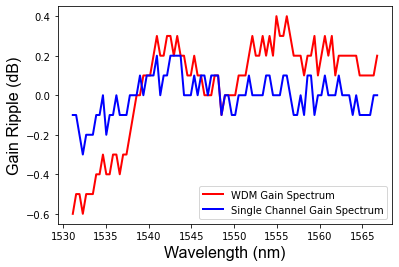

In [137]:
CM_booster = centreOfMassModel(WDM_booster_1, single_ch_booster_EDFA, 90)
wav = convertToWavelength(np.arange(90))
plt.plot(wav, WDM_booster_1, 'r', linewidth=2)
plt.plot(wav, single_ch_booster_EDFA, 'b', linewidth=2)
CM_booster = centreOfMassModel(WDM_booster_1, single_ch_booster_EDFA, 90)
plt.legend(['WDM Gain Spectrum', 'Single Channel Gain Spectrum', 'CM'])
plt.xlabel("Wavelength (nm)", fontsize=16, fontname="Arial")
plt.ylabel("Gain Ripple (dB)", fontsize=16, fontname="Arial")


In [138]:
activated_chs1 = [41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
                  56, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
                  86, 87]
spectra1 = [0.3999999999999986, 0.29999999999999716, 0.3000000000000007,
            0.3999999999999986, 0.20000000000000284, 0.20000000000000284,
            0.10000000000000142, 0.29999999999999716, 0.3000000000000007,
            0.29999999999999716, 0.1999999999999993, 0.1999999999999993,
            0.29999999999999716, 0.3999999999999986, 0.3999999999999986, 0.5,
            0.20000000000000284, 0.1999999999999993, 0.0, -0.10000000000000142,
            -0.1999999999999993, -0.3999999999999986, -0.20000000000000284,
            -0.1999999999999993, -0.3999999999999986, -0.3999999999999986,
            -0.3000000000000007, -0.3000000000000007, -0.3999999999999986,
            -0.5, -0.29999999999999716, -0.3000000000000007]

activated_chs2 = [9, 10, 11, 12, 13, 14, 15, 16, 41, 42, 43, 44, 45, 46, 47,
                  48]
spectra2 = [0.10000000000000142, 0.0, 0.09999999999999787, 0.09999999999999787,
            0.09999999999999787, 0.09999999999999787, 0.1999999999999993,
            0.1999999999999993, -0.10000000000000142, -0.10000000000000142,
            -0.10000000000000142, -0.20000000000000284, -0.10000000000000142,
            -0.1999999999999993, -0.20000000000000284, -0.10000000000000142]

activated_chs3 = [9,  10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                  24, 41, 42,  43, 44, 45,  46, 47, 48, 49, 50, 51, 52, 53,
                  54, 55, 56]
spectra3 = [0.0, 0.10000000000000142, 0.09999999999999787, 0.09999999999999787,
            0.0, 0.09999999999999787, 0.1999999999999993, 0.09999999999999787,
            0.09999999999999787, 0.10000000000000142, 0.0, 0.09999999999999787,
            0.10000000000000142, 0.1999999999999993, 0.0, 0.09999999999999787,
            0.0, 0.0, -0.10000000000000142, -0.10000000000000142,
            -0.1999999999999993, -0.3000000000000007, -0.3000000000000007,
            -0.10000000000000142, -0.20000000000000284, -0.10000000000000142,
            -0.20000000000000284, -0.20000000000000284, -0.10000000000000142,
            0.0, 0.0, 0.0]


0.2634722222222217


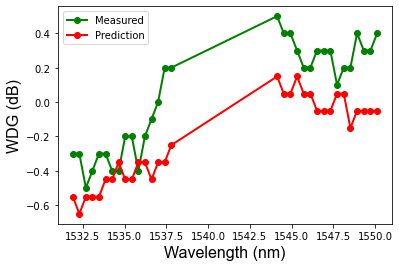

In [139]:
predictFunction(activated_chs1, spectra1, CM_booster)


0.09305555555555643


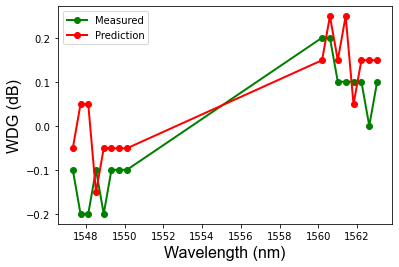

In [140]:
predictFunction(activated_chs2, spectra2, CM_booster)


0.11180555555555631


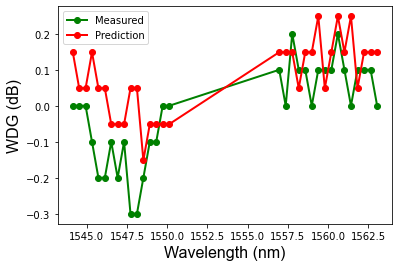

In [141]:
predictFunction(activated_chs3, spectra3, CM_booster)


In [142]:
# inline EDFA

In [143]:
single_ch_inline_EDFA = [-0.12736842105263335, -0.12736842105263335,
                         -0.12736842105263335, -0.12736842105263335,
                         -0.12736842105263335, -0.12736842105263335,
                         -0.227368421052633, -0.12736842105263335,
                         -0.027368421052633707, -0.027368421052633707,
                         -0.027368421052633707, -0.027368421052633707,
                         0.07263157894736771, -0.12736842105263335,
                         -0.12736842105263335, -0.027368421052633707,
                         -0.027368421052633707, -0.12736842105263335,
                         -0.12736842105263335, -0.027368421052633707,
                         -0.027368421052633707, -0.12736842105263335,
                         -0.027368421052633707, -0.12736842105263335,
                         -0.12736842105263335, -0.027368421052633707,
                         -0.12736842105263335, -0.227368421052633,
                         -0.027368421052633707, -0.027368421052633707,
                         0.17263157894736736, 0.07263157894736771,
                         0.17263157894736736, 0.07263157894736771,
                         -0.027368421052633707, 0.07263157894736771,
                         -0.027368421052633707, 0.07263157894736771,
                         -0.027368421052633707, -0.12736842105263335,
                         -0.027368421052633707, 0.07263157894736771,
                         -0.12736842105263335, 0.07263157894736771,
                         0.17263157894736736, -0.027368421052633707,
                         0.07263157894736771, 0.07263157894736771,
                         -0.027368421052633707, -0.027368421052633707,
                         -0.027368421052633707, -0.027368421052633707,
                         -0.027368421052633707, 0.07263157894736771,
                         0.17263157894736736, 0.07263157894736771,
                         0.07263157894736771, 0.17263157894736736,
                         0.07263157894736771, 0.07263157894736771,
                         0.07263157894736771, 0.07263157894736771,
                         -0.027368421052633707, -0.027368421052633707,
                         0.07263157894736771, 0.07263157894736771,
                         -0.027368421052633707, 0.07263157894736771,
                         0.07263157894736771, 0.07263157894736771,
                         -0.027368421052633707, 0.07263157894736771,
                         0.07263157894736771, 0.07263157894736771,
                         -0.027368421052633707, 0.07263157894736771,
                         0.07263157894736771, 0.07263157894736771,
                         0.07263157894736771, 0.07263157894736771,
                         -0.12736842105263335, -0.027368421052633707,
                         0.17263157894736736, 0.07263157894736771,
                         -0.027368421052633707, 0.07263157894736771,
                         -0.027368421052633707,  0.07263157894736771,
                         -0.027368421052633707, -0.027368421052633707]


In [144]:
WDM_inline = [0.28736842105263705, 0.18736842105263563, 0.08736842105263598,
              -0.01263157894736544, -0.11263157894736509,
              -0.012631578947363664, 0.0873684210526342, 0.08736842105263598,
              -0.01263157894736544, -0.01263157894736544, 0.08736842105263598,
              0.08736842105263598, 0.28736842105263527, -0.01263157894736544,
              -0.01263157894736544, 0.08736842105263598, 0.08736842105263598,
              0.08736842105263598, 0.0873684210526342, 0.08736842105263598,
              -0.11263157894736686, -0.01263157894736544, -0.01263157894736544,
              0.0873684210526342, 0.0873684210526342, -0.012631578947363664,
              -0.11263157894736331, -0.01263157894736544, -0.01263157894736544,
              0.18736842105263385, 0.18736842105263385, 0.08736842105263598,
              0.08736842105263598, 0.18736842105263385, 0.08736842105263598,
              0.18736842105263385, 0.0873684210526342, -0.01263157894736544,
              -0.01263157894736544, -0.01263157894736544, 0.08736842105263598,
              -0.01263157894736544, -0.11263157894736331, -0.11263157894736509,
              -0.11263157894736509, -0.11263157894736331, -0.11263157894736331,
              -0.012631578947363664, -0.11263157894736686, -0.2126315789473665,
              -0.2126315789473665, -0.01263157894736544, -0.11263157894736686,
              -0.11263157894736686, -0.01263157894736544, -0.11263157894736331,
              -0.01263157894736544, -0.01263157894736544, 0.18736842105263385,
              0.0873684210526342, -0.012631578947363664, 0.0873684210526342,
              0.0873684210526342, 0.0873684210526342, 0.18736842105263385,
              0.18736842105263385, 0.08736842105263598, 0.08736842105263598,
              0.0873684210526342, -0.012631578947363664, 0.08736842105263598,
              -0.012631578947363664, -0.01263157894736544,
              -0.012631578947363664, -0.01263157894736544,
              -0.01263157894736544, -0.012631578947363664,
              -0.11263157894736509, -0.3126315789473626, -0.21263157894736473,
              -0.11263157894736331, -0.21263157894736473, -0.11263157894736509,
              -0.21263157894736473, -0.11263157894736509, -0.21263157894736473,
              -0.11263157894736331, -0.21263157894736295,
              -0.012631578947363664, -0.11263157894736686]


Text(0, 0.5, 'Gain Ripple (dB)')

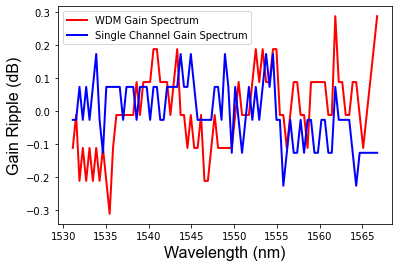

In [145]:
CM_inline = centreOfMassModel(WDM_inline, single_ch_inline_EDFA, 90)
wav = convertToWavelength(np.arange(90))
plt.plot(wav, WDM_inline, 'r', linewidth=2)
plt.plot(wav, single_ch_inline_EDFA, 'b', linewidth=2)
CM_inline = centreOfMassModel(WDM_inline, single_ch_inline_EDFA, 90)
plt.legend(['WDM Gain Spectrum', 'Single Channel Gain Spectrum', 'CM'])
plt.xlabel("Wavelength (nm)", fontsize=16, fontname="Arial")
plt.ylabel("Gain Ripple (dB)", fontsize=16, fontname="Arial")


In [146]:
activated_chs4 = [1, 3, 4, 6, 10, 13, 15, 18, 22, 23, 27, 33, 34, 35, 47, 48,
                  50, 53, 54, 56, 58, 60, 62, 66, 67, 68, 69, 70, 71, 72, 73,
                  74, 75, 81, 83, 85, 87, 89]
spectra4 = [0.1657894736842085, -0.03421052631579258, -0.03421052631579258,
            0.06578947368420884, 0.1657894736842085, 0.06578947368420884,
            0.06578947368420884, -0.03421052631579258, -0.03421052631579258,
            0.16578947368421026, 0.26578947368420813, 0.1657894736842085,
            0.06578947368420884, 0.1657894736842085, -0.03421052631579258,
            -0.13421052631579222, -0.03421052631579258, -0.03421052631579258,
            -0.03421052631579258, 0.06578947368420884, 0.06578947368420884,
            -0.03421052631579258, 0.16578947368421026, 0.06578947368420884,
            -0.03421052631579258, -0.03421052631579258, -0.03421052631579258,
            -0.03421052631579258, -0.03421052631579258, -0.03421052631579258,
            -0.03421052631579258, -0.13421052631579222, -0.23421052631579187,
            -0.23421052631579187, -0.13421052631579222, -0.03421052631579258,
            -0.13421052631579222, -0.13421052631579222]

activated_chs5 = [3, 9, 12, 22, 46, 67, 69, 77, 87]
spectra5 = [-0.06666666666666465, -0.06666666666666465, 0.03333333333333499,
            0.03333333333333499, -0.06666666666666465, 0.1333333333333364,
            0.1333333333333364, -0.06666666666666643, -0.06666666666666465]

activated_chs6 = [0, 3, 4, 5, 6, 13, 14, 30, 32, 34, 39, 42, 45, 46, 48, 52,
                  56, 58, 59, 62, 64, 70, 72, 76, 79, 81, 83, 88, 89]
spectra6 = [-0.020689655172414945, -0.020689655172414945,
            -0.020689655172414945, 0.07931034482758648, 0.07931034482758648,
            0.07931034482758648, 0.07931034482758648, 0.17931034482758612,
            0.07931034482758648, -0.020689655172414945, -0.020689655172414945,
            -0.020689655172414945, -0.12068965517241459, -0.12068965517241459,
            -0.12068965517241459, 0.07931034482758648, 0.07931034482758648,
            0.07931034482758648, 0.07931034482758648, 0.17931034482758612,
            0.17931034482758612, 0.07931034482758648, 0.07931034482758648,
            -0.22068965517241423, -0.22068965517241423, -0.12068965517241459,
            -0.22068965517241423, -0.12068965517241459, -0.020689655172414945]


0.0697722376115734


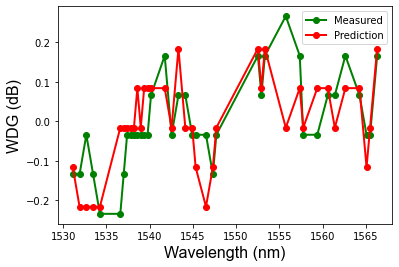

In [147]:
predictFunction(activated_chs4, spectra4, CM_inline)


0.0943079922027296


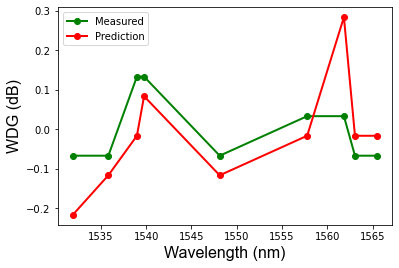

In [148]:
predictFunction(activated_chs5, spectra5, CM_inline)


0.07003539367642257


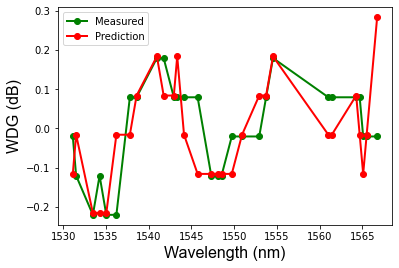

In [149]:
predictFunction(activated_chs6, spectra6, CM_inline)


In [150]:
# Preamp EDFA

In [151]:
single_ch_preamp_EDFA = [0.04822222222222372, 0.06822222222221974,
                         0.03822222222222216, 0.04822222222222372,
                         0.028222222222220594, 0.05822222222222173,
                         0.03822222222222216, 0.00822222222222102,
                         0.03822222222222216, 0.008222222222217468,
                         0.028222222222224147, 0.018222222222222584,
                         0.03822222222222216, 0.028222222222220594,
                         0.01822222222221903, 0.01822222222221903,
                         0.028222222222220594, 0.03822222222222571,
                         0.05822222222222173, 0.018222222222222584,
                         0.05822222222222173, 0.03822222222222216,
                         0.008222222222224573, 0.01822222222221903,
                         -0.03177777777777813, 0.03822222222222216,
                         0.018222222222222584, 0.06822222222221974,
                         0.028222222222224147, 0.03822222222222571,
                         0.018222222222222584, 0.04822222222222372,
                         0.05822222222222173, 0.018222222222222584,
                         0.058222222222225284, 0.018222222222222584,
                         0.058222222222225284, 0.03822222222222216,
                         0.028222222222224147, 0.03822222222222216,
                         -0.011777777777775, 0.01822222222221903,
                         0.00822222222222102, -0.0017777777777769899,
                         -0.011777777777778553, -0.011777777777778553,
                         -0.0017777777777805426, -0.06177777777777571,
                         -0.03177777777777813, -0.0017777777777769899,
                         -0.021777777777776564, -0.0017777777777769899,
                         -0.03177777777777813, -0.031777777777774574,
                         -0.04177777777777969, -0.04177777777777969,
                         -0.061777777777779264, -0.04177777777777614,
                         -0.0517777777777777, -0.03177777777777813,
                         -0.06177777777777571, -0.04177777777777969,
                         -0.04177777777777614, -0.0517777777777777,
                         -0.0517777777777777, -0.021777777777776564,
                         -0.03177777777777813, -0.031777777777774574,
                         0.01822222222221903, -0.03177777777777813,
                         -0.03177777777777813, -0.021777777777780116,
                         -0.011777777777778553, 0.018222222222222584,
                         -0.0017777777777805426, -0.03177777777777813,
                         -0.021777777777776564, -0.06177777777777571,
                         -0.0017777777777769899, -0.03177777777777813,
                         -0.07177777777777727, -0.03177777777777813,
                         -0.0017777777777769899, -0.011777777777778553,
                         -0.0017777777777769899, 0.00822222222222102,
                         -0.011777777777778553, -0.07177777777777727,
                         -0.07177777777777727, -0.06177777777777571]


In [152]:
WDM_preamp = [-0.0700632558140235, -0.0700632558140235, -0.17006325581402493,
              -0.17006325581402493, -0.17006325581402493, -0.0700632558140235,
              0.029936744185977915, -0.0700632558140235, -0.0700632558140235,
              -0.0700632558140235, -0.17006325581402493, -0.0700632558140235,
              -0.17006325581402493, -0.07006325581401995, -0.0700632558140235,
              0.029936744185977915, -0.07006325581401995, -0.07006325581401995,
              0.029936744185977915, 0.029936744185977915, 0.029936744185977915,
              0.029936744185977915, -0.0700632558140235, -0.17006325581402137,
              0.029936744185977915, -0.07006325581401995, -0.07006325581401995,
              -0.07006325581401995, -0.17006325581402137, -0.17006325581402137,
              -0.17006325581402137, -0.17006325581402137, -0.17006325581402493,
              -0.07006325581401995, 0.029936744185977915, 0.029936744185977915,
              -0.0700632558140235, 0.029936744185977915, 0.029936744185977915,
              0.029936744185977915, 0.029936744185977915, 0.12993674418597578,
              0.029936744185977915, 0.029936744185977915, 0.029936744185977915,
              0.029936744185977915, 0.12993674418597578, 0.12993674418597934,
              0.12993674418597934, 0.12993674418597578, 0.12993674418597934,
              0.12993674418597578, 0.029936744185977915, 0.12993674418597934,
              0.2299367441859772, 0.3299367441859786, 0.2299367441859772,
              0.2299367441859772, 0.2299367441859772, 0.2299367441859772,
              0.3299367441859751, 0.2299367441859772, 0.2299367441859772,
              0.12993674418597578, 0.12993674418597934, 0.029936744185977915,
              0.12993674418597934, 0.029936744185977915, -0.07006325581401995,
              0.029936744185977915, -0.0700632558140235, -0.17006325581402493,
              -0.17006325581402493, -0.17006325581402493, -0.2700632558140228,
              -0.17006325581402137, -0.17006325581402493, -0.0700632558140235,
              -0.0700632558140235, -0.17006325581402137, -0.07006325581401995,
              0.029936744185977915, 0.029936744185977915, -0.0700632558140235,
              -0.0700632558140235, -0.0700632558140235, -0.17006325581402137,
              0.029936744185977915, 0.029936744185977915, 0.12993674418597578]


Text(0, 0.5, 'Gain Ripple (dB)')

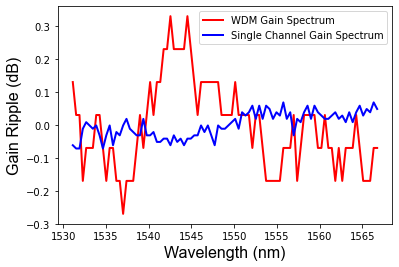

In [153]:
CM_preamp = centreOfMassModel(WDM_preamp, single_ch_preamp_EDFA, 90)
wav = convertToWavelength(np.arange(90))
plt.plot(wav, WDM_preamp, 'r', linewidth=2)
plt.plot(wav, single_ch_preamp_EDFA, 'b', linewidth=2)
CM_preamp = centreOfMassModel(WDM_preamp, single_ch_preamp_EDFA, 90)
plt.legend(['WDM Gain Spectrum', 'Single Channel Gain Spectrum', 'CM'])
plt.xlabel("Wavelength (nm)", fontsize=16, fontname="Arial")
plt.ylabel("Gain Ripple (dB)", fontsize=16, fontname="Arial")


In [154]:
activated_chs7 = [2, 3, 4, 7, 9, 11, 14, 15, 20, 21, 26, 27, 30, 32, 33, 36,
                  39, 40, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58,
                  59, 60, 62, 65, 66, 67, 72, 73, 76, 77, 78, 79, 80, 84, 85,
                  88, 89]

spectra7 = [0.16338556104211932, 0.0633855610421179, -0.03661443895787997,
            -0.03661443895788352, 0.0633855610421179, -0.03661443895788352,
            -0.03661443895787997, 0.0633855610421179, -0.03661443895788352,
            -0.03661443895788352, 0.0633855610421179, 0.16338556104211577,
            0.0633855610421179, 0.0633855610421179, 0.0633855610421179,
            0.0633855610421179, 0.0633855610421179, 0.16338556104211932,
            0.0633855610421179, -0.03661443895788352, -0.03661443895788352,
            0.0633855610421179, -0.03661443895787997, -0.03661443895788352,
            -0.03661443895788352, 0.26338556104212074, 0.0633855610421179,
            0.0633855610421179, 0.16338556104211932, 0.2633855610421172,
            0.2633855610421172, 0.26338556104212074, 0.2633855610421172,
            0.2633855610421172, 0.16338556104211932, 0.16338556104211932,
            0.0633855610421179, -0.13661443895788494, -0.2366144389578828,
            -0.2366144389578828, -0.2366144389578828, -0.3366144389578807,
            -0.4366144389578821, -0.33661443895788423, -0.23661443895787926,
            -0.2366144389578828, -0.03661443895787997, -0.1366144389578814]

activated_chs8 = [3, 4, 5, 8, 10, 12, 13, 18, 22, 23, 25, 26, 27, 32, 36, 37,
                  39, 40, 42, 46, 49, 52, 53, 56, 58, 60, 61, 64, 68, 70, 74,
                  76, 77, 83, 84, 88]

spectra8 = [0.08373693440822194, -0.1162630655917738, -0.01626306559177948,
            0.08373693440822194, -0.01626306559177948, 0.08373693440822194,
            -0.01626306559177948, -0.1162630655917738, -0.01626306559177237,
            0.08373693440822194, 0.08373693440822194, -0.01626306559177948,
            -0.01626306559177948, 0.08373693440822194, 0.08373693440822194,
            0.08373693440822194, -0.01626306559177948, -0.01626306559177948,
            0.18373693440822336, -0.01626306559177948, 0.08373693440822194,
            0.08373693440822194, 0.18373693440822336, 0.2837369344082248,
            0.18373693440822336, 0.3837369344082262, 0.3837369344082262,
            0.08373693440822194, -0.01626306559177237, -0.016263065591772374,
            -0.21626306559177522, -0.31626306559177664, -0.21626306559177522,
            -0.1162630655917738, -0.1162630655917738, -0.1162630655917738]

activated_chs9 = [8, 17, 24, 36, 38, 43, 50, 53, 56, 60, 68, 69]

spectra9 = [0.04575221692896392, 0.04575221692896747, 0.14575221692896534,
            -0.05424778307103395, 0.04575221692896747, 0.04575221692896747,
            0.04575221692896392, 0.14575221692896534, 0.04575221692896392,
            0.2457522169289632, 0.04575221692896392, 0.04575221692896747]


0.12731916712388028


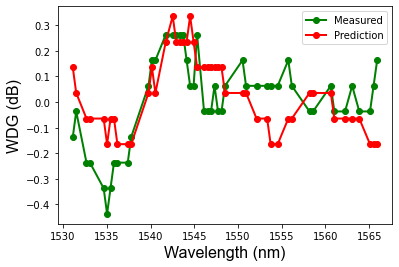

In [155]:
predictFunction(activated_chs7, spectra7, CM_preamp)


0.10217157072866685


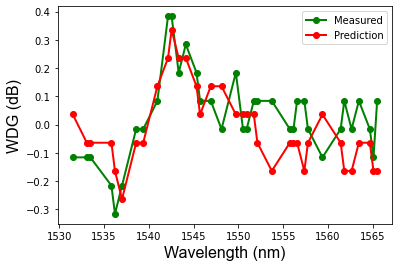

In [156]:
predictFunction(activated_chs8, spectra8, CM_preamp)


0.07176499735337187


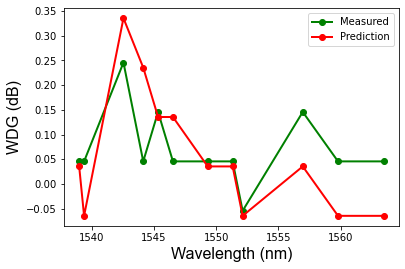

In [157]:
predictFunction(activated_chs9, spectra9, CM_preamp)
